# Import

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

!pip install kmodes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Mount drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Preprocessing

In [ ]:
df_unsupervised = pd.read_csv('/content/drive/MyDrive/PoliceProject/checkpoint-4/officer_data_allegations.csv')
print(df_unsupervised.columns)
df_unsupervised.head()

Index(['id', 'officer_allegations', 'gender', 'race', 'appointed_date',
       'years_of_service', 'rank', 'active', 'birth_year', 'age', 'first_name',
       'last_name', 'complaint_percentile', 'civilian_allegation_percentile',
       'honorable_mention_percentile', 'internal_allegation_percentile',
       'trr_percentile', 'allegation_count', 'sustained_count',
       'civilian_compliment_count', 'current_salary', 'discipline_count',
       'honorable_mention_count', 'last_unit_id', 'major_award_count',
       'trr_count', 'unsustained_count', 'civilian_allegations'],
      dtype='object')


,id,officer_allegations,gender,race,appointed_date,years_of_service,rank,active,birth_year,age,...,sustained_count,civilian_compliment_count,current_salary,discipline_count,honorable_mention_count,last_unit_id,major_award_count,trr_count,unsustained_count,civilian_allegations
0,1,1,M,White,9/26/2005,17.0,Sergeant of Police,Yes,1971,51,...,0,4,101442.0,0,61,17.0,0,7,0,5
1,6,2,M,White,12/5/1994,27.0,Police Officer,No,1968,54,...,2,0,70656.0,0,2,21.0,0,2,2,4
2,7,1,M,White,12/4/1995,26.0,Police Officer,Yes,1972,50,...,0,3,93354.0,0,9,17.0,0,5,2,7
3,16,1,M,Asian/Pacific,4/28/2008,14.0,Sergeant of Police,Yes,1984,38,...,1,5,84054.0,1,29,8.0,0,24,6,18
4,17,1,M,Black,12/26/1989,32.0,Police Officer,No,1958,64,...,1,1,83706.0,1,2,20.0,0,0,14,24


In [ ]:
cols = df_unsupervised.columns
identifiers = ['officer_allegations', 'gender', 'race', 'age', 'civilian_allegations', 'years_of_service', 'major_award_count']

identifiers_index = []
for i in identifiers:
  identifiers_index.append(cols.get_loc(i))
  df_unsupervised = df_unsupervised[df_unsupervised[i].notna()]

df_unsupervised = df_unsupervised[identifiers]
df_values = df_unsupervised.values

df_unsupervised.nunique()

officer_allegations      18
gender                    2
race                      5
age                      69
civilian_allegations    107
years_of_service         64
major_award_count         6
dtype: int64

1
2
3
4
5
6
7
8
9


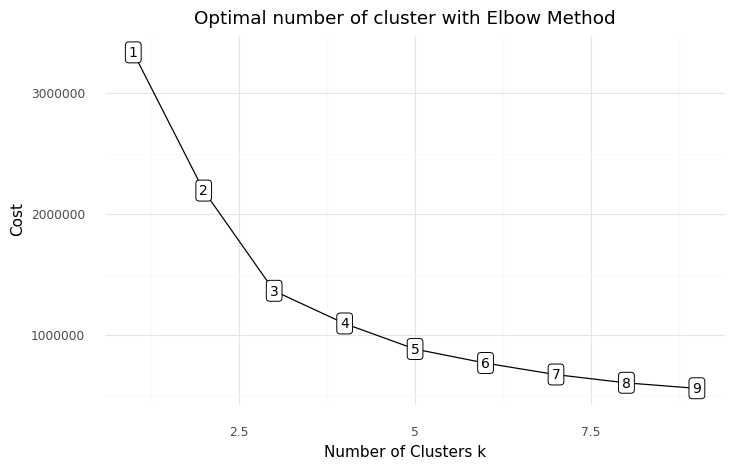

<ggplot: (8775603418105)>

In [ ]:
from plotnine import *
import plotnine

X = df_unsupervised.iloc[:,:-1]
X.columns = ['feature{}'.format(i) for i in X.columns]

cost = []
for cluster in range(1, 10):
  kproto = KPrototypes(n_clusters=cluster, max_iter=20).fit(X, categorical=[1, 2])
  cost.append(kproto.cost_)
  print(cluster)

df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)



```
# Attempting with optimal clusters 3
```



In [ ]:


kproto = KPrototypes(n_clusters=3, max_iter=20).fit(X, categorical=[1, 2])


In [ ]:
print(kproto.cluster_centroids_)

[['1.635119188104791' '49.155534576351194' '9.546377153646448'
  '20.824168043426955' 'M' 'White']
 ['2.3763608087091757' '57.283825816485226' '40.62597200622084'
  '29.214618973561432' 'M' 'White']
 ['1.6899884035562427' '67.46926942404329' '11.492848859683031'
  '37.07421724004639' 'M' 'White']]


In [ ]:
from scipy.stats import chi2_contingency
def chi_test(ds,labels):
    ct = pd.crosstab(ds,labels)    
    return chi2_contingency(ct)

res =X.apply(lambda x:chi_test(x, kproto.labels_)[:-1]).T
res.columns = ["chi2","p","df"]

In [ ]:
res.sort_values("p")

,chi2,p,df
featureage,6350.184718,0.000000e+00,136.0
featurecivilian_allegations,7357.797890,0.000000e+00,212.0
featureyears_of_service,5939.654431,0.000000e+00,126.0
featureofficer_allegations,369.019143,6.971831e-58,34.0
featuregender,231.554412,5.231164e-51,2.0
featurerace,255.823765,1.003186e-50,8.0


Cluster 1 Analysis

In [ ]:
clusters = kproto.predict(X, categorical=[1, 2])
df_unsupervised['cluster'] = list(clusters)
df_unsupervised[df_unsupervised['cluster']== 0].head(10)

,officer_allegations,gender,race,age,civilian_allegations,years_of_service,major_award_count,cluster
0,1,M,White,51,5,17.0,0,0
1,2,M,White,54,4,27.0,0,0
2,1,M,White,50,7,26.0,0,0
3,1,M,Asian/Pacific,38,18,14.0,0,0
5,1,M,Asian/Pacific,46,4,23.0,0,0
8,2,M,Black,49,13,24.0,0,0
9,2,M,Asian/Pacific,51,11,24.0,0,0
10,1,F,White,43,4,17.0,0,0
11,2,M,Hispanic,53,18,27.0,0,0
12,2,M,Hispanic,48,5,21.0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab73c590>]],
      dtype=object)

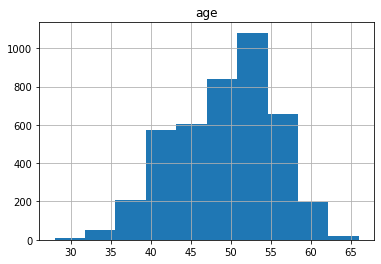

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 0].hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab5d3f10>]],
      dtype=object)

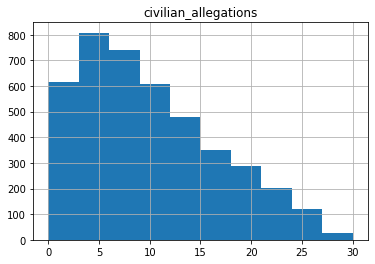

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 0].hist(column='civilian_allegations')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab563e50>]],
      dtype=object)

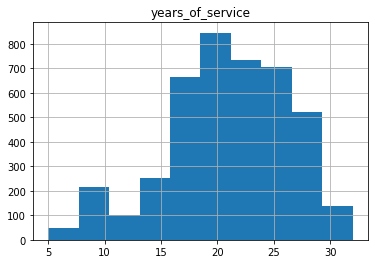

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 0].hist(column='years_of_service')

In [ ]:
df_unsupervised[df_unsupervised['cluster']==1].head(10)

,officer_allegations,gender,race,age,civilian_allegations,years_of_service,major_award_count,cluster
16,1,M,Hispanic,66,35,40.0,1,1
34,4,M,Black,72,41,36.0,1,1
35,1,M,White,62,31,27.0,1,1
41,3,M,White,54,28,29.0,0,1
42,5,M,White,52,27,28.0,0,1
46,3,M,Hispanic,67,35,40.0,0,1
52,2,M,Hispanic,62,40,36.0,1,1
61,4,M,Black,57,25,28.0,0,1
74,1,M,Hispanic,64,32,30.0,1,1
100,1,M,White,60,27,28.0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab4ece10>]],
      dtype=object)

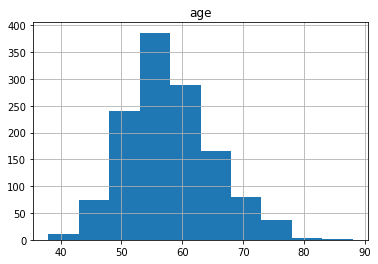

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 1].hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab796f10>]],
      dtype=object)

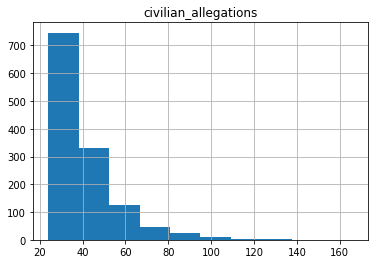

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 1].hist(column='civilian_allegations')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab38ae50>]],
      dtype=object)

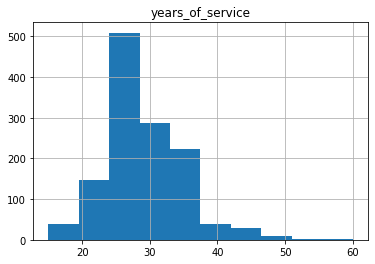

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 1].hist(column='years_of_service')

In [ ]:
df_unsupervised[df_unsupervised['cluster']==2].head(10)

,officer_allegations,gender,race,age,civilian_allegations,years_of_service,major_award_count,cluster
4,1,M,Black,64,24,32.0,0,2
6,1,M,Asian/Pacific,73,4,22.0,0,2
7,1,M,Black,59,5,36.0,0,2
18,1,M,Hispanic,62,12,28.0,0,2
20,1,M,Hispanic,83,7,59.0,1,2
23,2,M,White,61,5,28.0,0,2
24,1,M,Black,80,24,58.0,1,2
25,2,M,White,88,10,62.0,0,2
26,1,F,Black,63,10,39.0,0,2
29,2,F,Black,67,15,32.0,0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab3332d0>]],
      dtype=object)

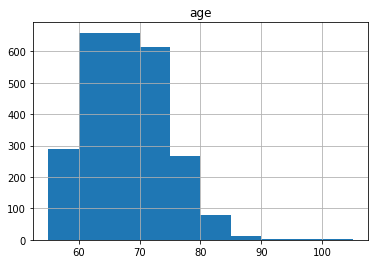

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 2].hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab2e8b50>]],
      dtype=object)

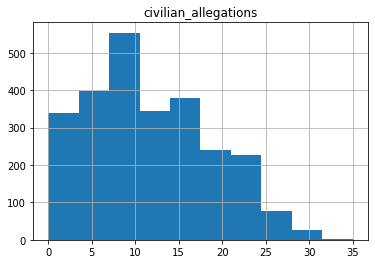

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 2].hist(column='civilian_allegations')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3ab1d83d0>]],
      dtype=object)

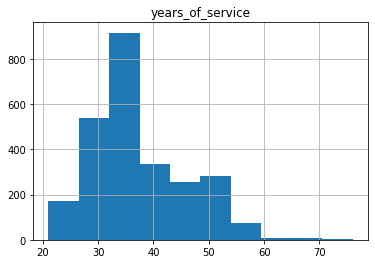

In [ ]:
df_unsupervised[df_unsupervised['cluster']== 2].hist(column='years_of_service')